# Predicting Yelp Ratings

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

## a)
Treating "Missing" as an explicit category is a reasonable approach. The missing data in the variables could provide useful information to the model; perhaps there is a reason why some restaurants choose not to include certain attributes, then we can trace and quantify the reason. Additionally, the amount of missing data is substantial and should not be ignored, and dropping all missing data could result in a significant loss of valid data. Since all variables are categorical, treating "Missing" as an explicit category is convenient and straightforward.

## b)

### 1)Build a linear regression model

In [2]:
yelp_train = pd.read_csv("yelp242a_train.csv")
yelp_train.info()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.0,9,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing)
1,3.5,12,TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing)
2,3.0,6,(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
3,4.0,1388,TRUE,'full_bar',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,FALSE,TRUE
4,3.0,77,TRUE,'beer_and_wine',TRUE,'no',FALSE,(Missing),(Missing),TRUE,TRUE,(Missing),(Missing)


In [3]:
model_train = smf.ols("stars ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))+ C(WiFi, Treatment(reference='(Missing)'))+ C(BikeParking, Treatment(reference='(Missing)'))+ C(ByAppointmentOnly, Treatment(reference='(Missing)'))+ C(WheelechairAccessible, Treatment(reference='(Missing)'))+ C(OutdoorSeating, Treatment(reference='(Missing)'))+ C(RestaurantsReservations, Treatment(reference='(Missing)'))+ C(DogsAllowed, Treatment(reference='(Missing)'))+ C(Caters, Treatment(reference='(Missing)'))", yelp_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     48.56
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          1.30e-218
Time:                        10:32:34   Log-Likelihood:                -7295.9
No. Observations:                6272   AIC:                         1.464e+04
Df Residuals:                    6246   BIC:                         1.482e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    3.3251      0.039     84.975      0.000       3.248       3.402
C(GoodForKids, Treatment(reference='(Missing)'))[T.FALSE]                   -0.0212      0.046     -0.462      0.644      -0.111       0.069
C(GoodForKids, Treatment(reference='(Missing)'))[T.TRUE]                    -0.1324      0.035     -3.740      0.000      -0.202      -0.063
C(Alcohol, Treatment(reference='(Missing)'))[T.'beer_and_wine']              0.1546      0.047      3.259      0.001       0.062       0.248
C(Alcohol, Treatment(reference='(Missing)'))[T.'full_bar']                   0.0456      0.045      1.019      0.308      -0.042       0.133
C(Alcohol, Treatment(reference='(Missing)'))[T.'none']                       0.0579      0.040      1.451      0.147      -0.020       0.136
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.FALSE]     0.5801      0.091      6.345      0.000       0.401       0.759
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.TRUE]      0.1203      0.046      2.605      0.009       0.030       0.211
C(WiFi, Treatment(reference='(Missing)'))[T.'free']                          0.0511      0.035      1.472      0.141      -0.017       0.119
C(WiFi, Treatment(reference='(Missing)'))[T.'no']                            0.0655      0.033      1.960      0.050   -2.49e-05       0.131
C(WiFi, Treatment(reference='(Missing)'))[T.'paid']                         -0.1849      0.103     -1.797      0.072      -0.387       0.017
C(BikeParking, Treatment(reference='(Missing)'))[T.FALSE]                   -0.1468      0.032     -4.557      0.000      -0.210      -0.084
C(BikeParking, Treatment(reference='(Missing)'))[T.TRUE]                    -0.0646      0.029     -2.226      0.026      -0.122      -0.008
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.FALSE]              0.1244      0.034      3.657      0.000       0.058       0.191
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.TRUE]               0.3499      0.100      3.500      0.000       0.154       0.546
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.FALSE]          0.7187      0.088      8.137      0.000       0.546       0.892
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.TRUE]           0.3671      0.028     13.335      0.000       0.313       0.421
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.FALSE]                -0.0815      0.041     -2.002      0.045      -0.161      -0.002
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.TRUE]                  0.0438      0.043      1.016      0.310      

### 2)Regression tree model and cp value

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

yelp_train = pd.read_csv('yelp242a_train.csv')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best ccp_alpha value: 0.00101010101010101


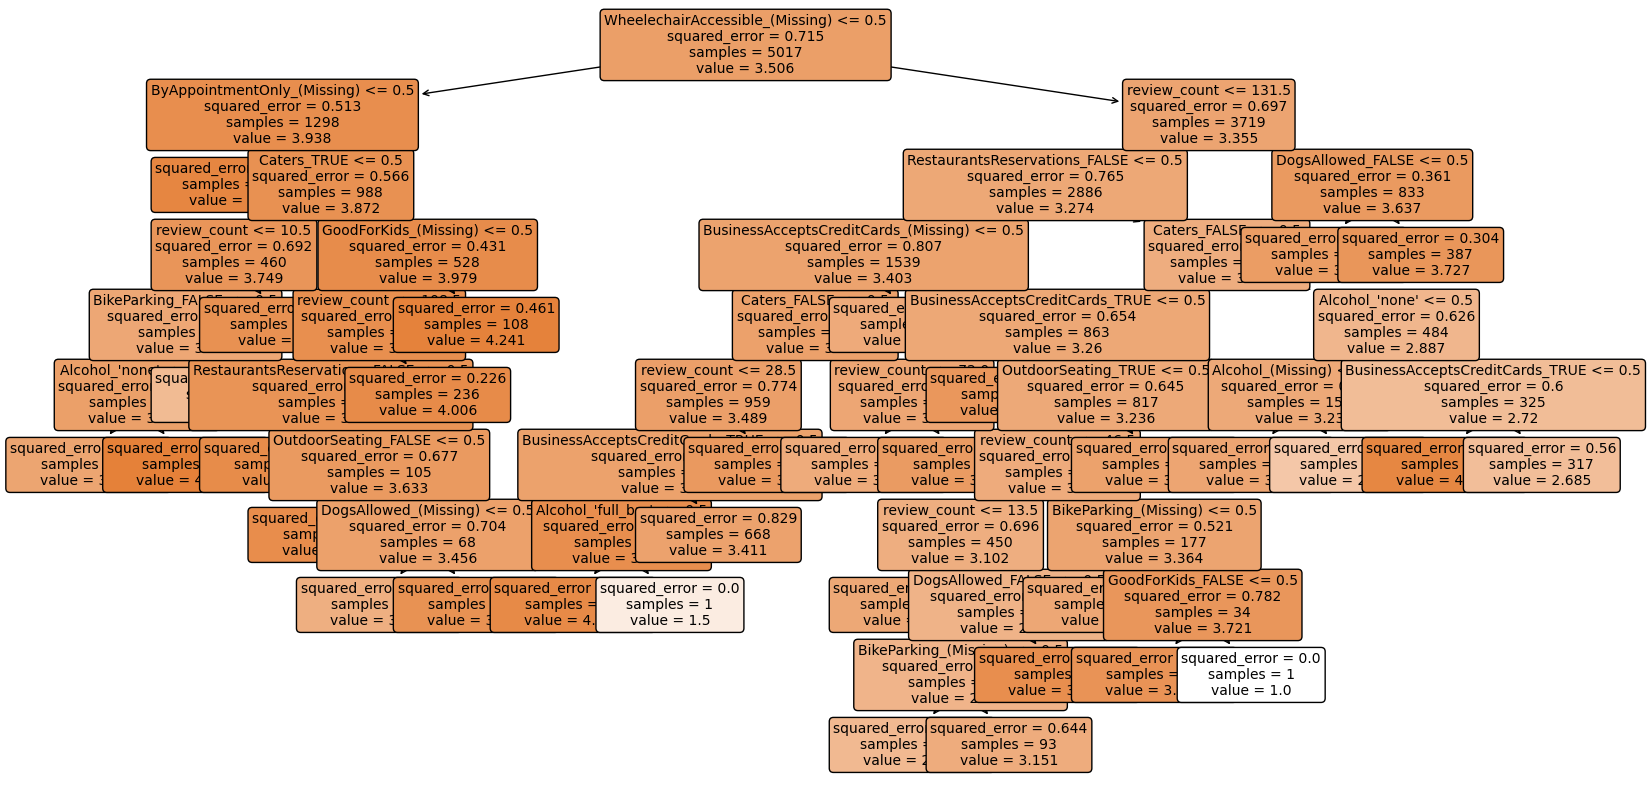

Validation R-squared score: 0.16478284124701392


In [6]:
# Preprocess the data
# Convert categorical variables into dummy variables, including "(Missing)" as a valid category
yelp_train = pd.get_dummies(yelp_train, drop_first=False)

# Define feature matrix (X) and target variable (y)
X = yelp_train.drop(columns=['stars'])
y = yelp_train['stars']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation to select best ccp_alpha using GridSearchCV
# Define a range of possible ccp_alpha values for pruning
grid_values = {'ccp_alpha': np.linspace(0, 0.1, 100), 'min_samples_leaf': [5], 'max_depth': [30]}

# Initialize a DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=88, min_samples_split=20)

# Use GridSearchCV to find the best ccp_alpha value
grid_search = GridSearchCV(dtr, param_grid=grid_values, cv=10, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best ccp_alpha value found
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
print(f'Best ccp_alpha value: {best_ccp_alpha}')

# Fit the final decision tree regressor using the best ccp_alpha
final_tree = DecisionTreeRegressor(random_state=88, ccp_alpha=best_ccp_alpha, min_samples_split=20)
final_tree.fit(X_train, y_train)

# Plot the final tree
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# Evaluate model on validation set
val_score = final_tree.score(X_val, y_val)
print(f'Validation R-squared score: {val_score}')

### 3)OSR2 Value

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Load test set data
yelp_test = pd.read_csv('yelp242a_test.csv')

# Preprocess the test data (handle missing values, categorical features)
yelp_test = pd.get_dummies(yelp_test, drop_first=False)

# Align the columns of the test set with the training set
X_test = yelp_test.drop(columns=['stars'])
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Ensure same columns in both train and test
y_test = yelp_test['stars']

# Step 1: Train the Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Step 2: Define the OSR2 function
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred) ** 2)
    SST = np.sum((y_test - np.mean(y_train)) ** 2)
    return (1 - SSE / SST)

# Step 3: Calculate OSR^2 for Linear Regression Model
linear_model_osr2 = OSR2(lin_reg_model, X_test, y_test, y_train)

# Step 4: Assuming you have a trained regression tree model 'final_tree'
# Calculate OSR^2 for Regression Tree Model
regression_tree_osr2 = OSR2(final_tree, X_test, y_test, y_train)

# Step 5: Print the results
print(f"Linear Regression Model OSR2: {linear_model_osr2}")
print(f"Regression Tree Model OSR2: {regression_tree_osr2}")

Linear Regression Model OSR2: 0.17390908371413938
Regression Tree Model OSR2: 0.1882074570108162


### The regression tree model outperforms the linear regression model, as indicated by its slightly higher OSR2 value (0.1882 compared to 0.1759). The regression tree may be capturing non-linear relationships slightly better, but both models have room for improvement.

## c)

In [8]:
# Construct the new variable 'fourOrAbove' for training set
yelp_train['fourOrAbove'] = (yelp_train['stars'] >= 4).astype(int)

# Construct the new variable 'fourOrAbove' for test set
yelp_test['fourOrAbove'] = (yelp_test['stars'] >= 4).astype(int)

# Display the first 5 rows to verify
print(yelp_train[['stars', 'fourOrAbove']].head())
print(yelp_test[['stars', 'fourOrAbove']].head())

   stars  fourOrAbove
0    4.0            1
1    3.5            0
2    3.0            0
3    4.0            1
4    3.0            0
   stars  fourOrAbove
0    2.5            0
1    4.0            1
2    4.0            1
3    2.5            0
4    3.5            0


In [9]:
yelp_train.head()   # double check

,stars,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_(Missing),...,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_(Missing),Caters_FALSE,Caters_TRUE,fourOrAbove
0,4.0,9,False,False,True,False,True,False,False,False,...,False,True,False,True,False,False,True,False,False,1
1,3.5,12,False,False,True,False,False,False,True,False,...,True,False,False,True,False,False,True,False,False,0
2,3.0,6,True,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,False,False,0
3,4.0,1388,False,False,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,1
4,3.0,77,False,False,True,True,False,False,False,False,...,False,False,True,True,False,False,True,False,False,0


## d)

### 1)
The modeling choice of focusing on accuracy as the primary performance metric can be reasonable under certain conditions. If the value of false positives and false negatives is not significantly different, and the cost associated with false positives and false negatives is similar, then using accuracy may be reasonable. However, if most of the ratings are 4 or above, ratings below 4 may be ignored, which could lead to bias. In such cases, other metrics like precision or ROC might perform better.

### 2)

In [10]:
# Predict using the linear regression model
linear_reg_predictions = lin_reg_model.predict(X_train)

# Apply threshold of 4 to get binary classification for 'fourOrAbove'
linear_reg_classification = np.where(linear_reg_predictions >= 4, 1, 0)

# Predict using the regression tree model
regression_tree_predictions = final_tree.predict(X_train)

# Apply threshold of 4 to get binary classification for 'fourOrAbove'
regression_tree_classification = np.where(regression_tree_predictions >= 4, 1, 0)

# Print the first few predictions to verify
print("Linear Regression Model - Classified Predictions:")
print(linear_reg_classification[:10])  # Display first 10 predictions

print("Regression Tree Model - Classified Predictions:")
print(regression_tree_classification[:10])  # Display first 10 predictions

Linear Regression Model - Classified Predictions:
[0 1 1 0 1 0 0 1 0 0]
Regression Tree Model - Classified Predictions:
[0 1 1 0 1 0 0 0 0 0]


### 3) Logistic Regression Model

In [14]:
import pandas as pd
import statsmodels.formula.api as smf

yelp_train = pd.read_csv("yelp242a_train.csv") #defined above

# The binary target variable
yelp_train['fourOrAbove'] = (yelp_train['stars'] >= 4).astype(int)

# Check column names to ensure correctness
print(yelp_train.columns)

# Correct column names (adjust based on actual names from yelp_train.columns output)
logit_model = smf.logit(
    "fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + \
     C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + \
     C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + \
     C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) + \
     C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + \
     C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", 
    yelp_train
)

# Fit the model
logit_train = logit_model.fit()

# Summary of the model
print(logit_train.summary())


Index(['stars', 'review_count', 'GoodForKids', 'Alcohol',
       'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking',
       'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating',
       'RestaurantsReservations', 'DogsAllowed', 'Caters', 'fourOrAbove'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.612512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.1081
Time:                        10:37:51   Log-Likelihood:                -3841.7
converged:                       True   LL-Null:                       -4307.1
Covariance Type:            nonrobust   LLR p-value:       

### 4) Classification Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

In [24]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to dummy variables, including "(Missing)" as a valid category
yelp_train = pd.get_dummies(yelp_train, drop_first=False)

# Define feature matrix (X) and target variable (y)
X = yelp_train.drop(columns=['stars', 'fourOrAbove'])
y = yelp_train['fourOrAbove']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  
                                                    stratify=yelp_train['fourOrAbove'],
                                                    random_state=88,)
X_train.shape, X_test.shape

((4390, 36), (1882, 36))

Node count = 1


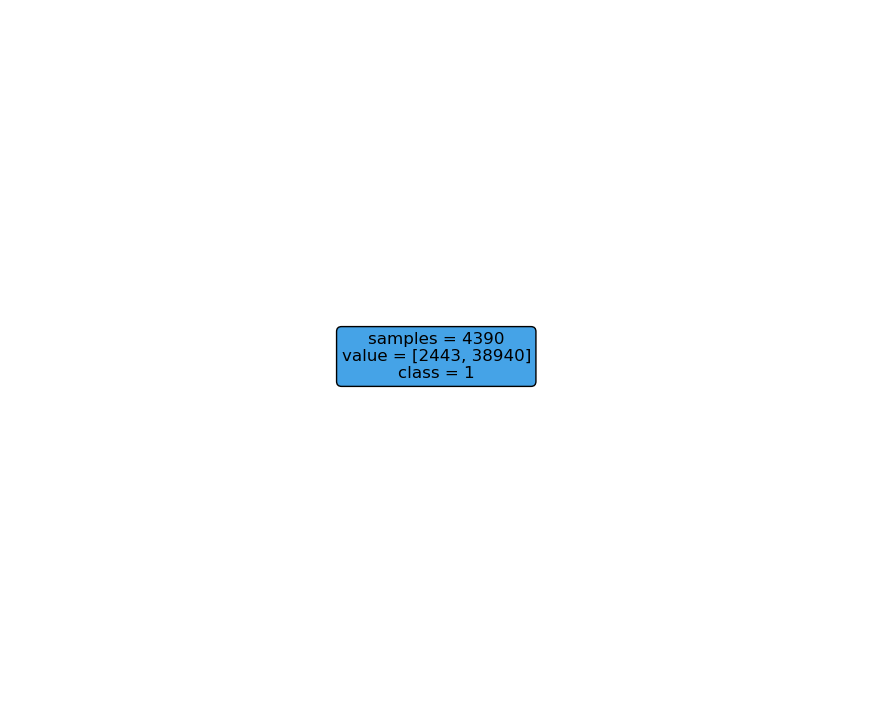

Confusion Matrix : 
 [[   0 1048]
 [   0  834]]
Accuracy is: 0.4431
TPR is: 1.0000
FPR is: 1.0000


In [25]:
# Initialize and train the DecisionTreeClassifier
dtc3 = DecisionTreeClassifier(
    min_samples_leaf=5,
    ccp_alpha=0.005,
    class_weight={0: 1, 1: 20},
    random_state=88
)

# Fit the classifier on the training data
dtc3 = dtc3.fit(X_train, y_train)

print('Node count =', dtc3.tree_.node_count)
plt.figure(figsize=(11,9))
plot_tree(dtc3, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12) 
plt.show()

y_pred = dtc3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm) 
# print('Precision:',precision_score(y_test, y_pred))
# print('Recall:',recall_score(y_test, y_pred))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

#### Cross validation to find cp

In [26]:
from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='accuracy', verbose=1)

In [27]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.508428
1,0.0005,0.449431
2,0.001,0.443508
3,0.0015,0.443508
4,0.002,0.443508
5,0.0025,0.443508
6,0.003,0.443508
7,0.0035,0.443508
8,0.004,0.443508
9,0.0045,0.443508


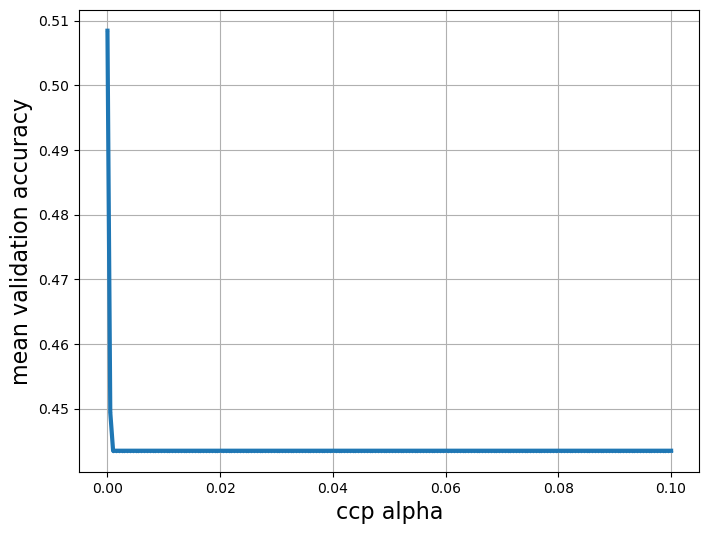

In [28]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [29]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.5084282460136674


Node count = 733


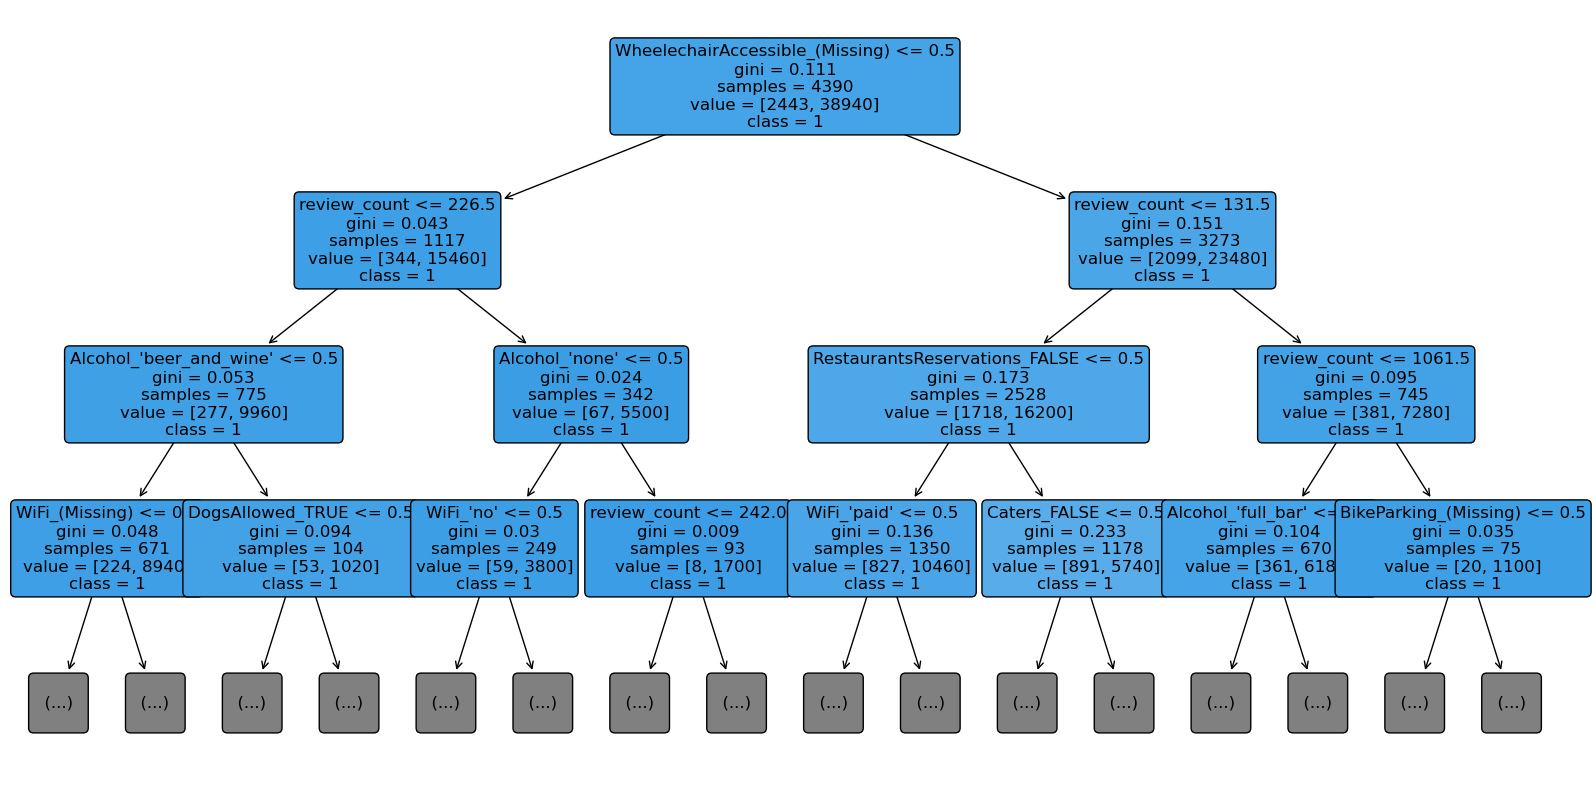

In [30]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [31]:
y_pred = dtc_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
# print('Precision:',precision_score(y_test, y_pred))
# print('Recall:',recall_score(y_test, y_pred))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[177 871]
 [ 59 775]]
Accuracy is: 0.5058
TPR is: 0.9293
FPR is: 0.8311


*I used 10-fold cross-validation to select the best complexity parameter (ccp_alpha) for the decision tree model. The training data was then divided into ten subsets, each time training the model on nine and validating it on the tenth. This process was repeated for different values of ccp_alpha, using GridSearchCV to evaluate the accuracy of each model configuration. The average accuracy across all folds was computed to determine the best-performing value of ccp_alpha. This approach helps balancing overfitting and underfitting by selecting an appropriate level of pruning, thus optimizing model performance. The final result I obtained was an accuracy of 0.5058, which may indicate that the model is not well-suited for using accuracy as the evaluation metric.

### 5)

In [32]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Placeholder for metrics storage
results = []

# Define function to calculate metrics and append to results
def calculate_metrics(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = (cm[0][0] + cm[1][1]) / sum(cm.ravel())
    TPR = cm[1][1] / (cm[1][1] + cm[1][0]) if (cm[1][1] + cm[1][0]) != 0 else 0
    FPR = cm[0][1] / (cm[0][1] + cm[0][0]) if (cm[0][1] + cm[0][0]) != 0 else 0
    results.append({'Model': model_name, 'Accuracy': acc, 'TPR': TPR, 'FPR': FPR})

# Baseline Model - Predict the most frequent class (e.g., class 0)
most_frequent_class = y_test.value_counts().idxmax()
baseline_predictions = [most_frequent_class] * len(y_test)
calculate_metrics("Baseline Model", y_test, baseline_predictions)

# Linear Regression Model with Thresholding
linear_reg_predictions = lin_reg_model.predict(X_test)
linear_reg_classification = (linear_reg_predictions >= 4).astype(int)
calculate_metrics("Linear Regression Model", y_test, linear_reg_classification)

# Regression Tree Model with Thresholding
regression_tree_predictions = final_tree.predict(X_test)
regression_tree_classification = (regression_tree_predictions >= 4).astype(int)
calculate_metrics("Regression Tree Model", y_test, regression_tree_classification)

# Classification Tree Model
y_pred_classification_tree = dtc_cv_acc.best_estimator_.predict(X_test)
calculate_metrics("Classification Tree Model", y_test, y_pred_classification_tree)

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Accuracy       TPR       FPR
0             Baseline Model  0.556854  0.000000  0.000000
1    Linear Regression Model  0.626993  0.203837  0.036260
2      Regression Tree Model  0.643464  0.273381  0.062023
3  Classification Tree Model  0.505845  0.929257  0.831107


*The Baseline Model has an accuracy of approximately 55.7%, with TPR and FPR being zero, failing to identify positive cases. The Linear Regression Model has an accuracy of 62.7%, showing some improvement over the baseline; however, the TPR is lower than the FPR, indicating that it struggles with true positive identification. The Regression Tree Model has an accuracy of 64.3%, with a good balance between TPR and FPR, and TPR > FPR, demonstrating improved performance in classifying positive and negative outcomes. The Classification Tree Model has the lowest accuracy at 50.6%, with a TPR of 0.93; however, its FPR is also high (83.1%), indicating a trade-off where the model effectively captures positives but frequently misclassifies negatives.

I would recommend the Regression Tree Model because it provides the best trade-off between accuracy, TPR, and FPR. It maintains a good balance, achieving decent accuracy and moderate positive identification while keeping false positives relatively low compared to the classification tree.

## e)

*Based on the logistic regression results, three tips that can help restaurants achieve a high star rating are: offering free WiFi or no WiFi, allowing dogs in the restaurant, and providing catering services. These features have low p-values, indicating a significant impact on whether a restaurant can receive high ratings.

Offering WiFi can attract a larger customer base and improve customer retention. A bustling restaurant will attract more new customers, which is key to maintaining long-term success and achieving high ratings.

Secondly, pet owners make up a certain portion of customers. A policy prohibiting dogs may result in losing these customers, so allowing dogs can give customers more options and bring in more clients.

Thirdly, providing catering services can attract substantial customer traffic in one go, as catering introduces the restaurant to a broad customer group, including both existing and many new customers. This indirect marketing can attract new customers, making a high rating achievable.

### WiFi Model

Average proportion of high ratings by WiFi:
WiFi
'free'       0.532187
'no'         0.411410
'paid'       0.327869
(Missing)    0.391584
Name: fourOrAbove, dtype: float64


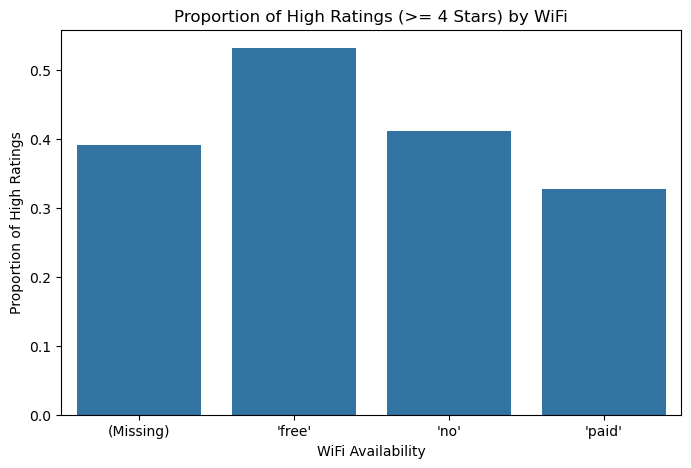

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

yelp_data = pd.read_csv('yelp242a_train.csv')

yelp_data['fourOrAbove'] = (yelp_data['stars'] >= 4).astype(int)

wifi_analysis = yelp_data.groupby('WiFi')['fourOrAbove'].mean()
print("Average proportion of high ratings by WiFi:")
print(wifi_analysis)

plt.figure(figsize=(8, 5))
sns.barplot(x='WiFi', y='fourOrAbove', data=yelp_data, errorbar=None)
plt.title('Proportion of High Ratings (>= 4 Stars) by WiFi')
plt.xlabel('WiFi Availability')
plt.ylabel('Proportion of High Ratings')
plt.show()


### DogsAllowed Model

Average proportion of high ratings by DogsAllowed:
DogsAllowed
(Missing)    0.366813
FALSE        0.641201
TRUE         0.671875
Name: fourOrAbove, dtype: float64


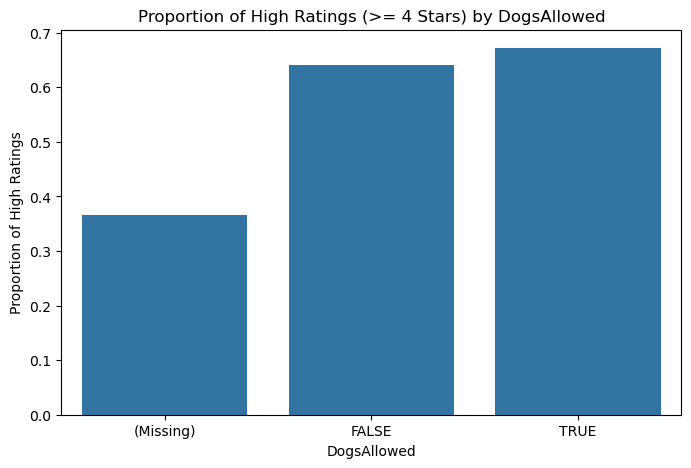

In [41]:
dogData = yelp_data.groupby('DogsAllowed')['fourOrAbove'].mean()
print("Average proportion of high ratings by DogsAllowed:")
print(dogData)

plt.figure(figsize=(8, 5))
sns.barplot(x='DogsAllowed', y='fourOrAbove', data=yelp_data, errorbar=None)
plt.title('Proportion of High Ratings (>= 4 Stars) by DogsAllowed')
plt.xlabel('DogsAllowed')
plt.ylabel('Proportion of High Ratings')
plt.show()

### Catering Model

Average proportion of high ratings by Caters:
Caters
(Missing)    0.391183
FALSE        0.394824
TRUE         0.551707
Name: fourOrAbove, dtype: float64


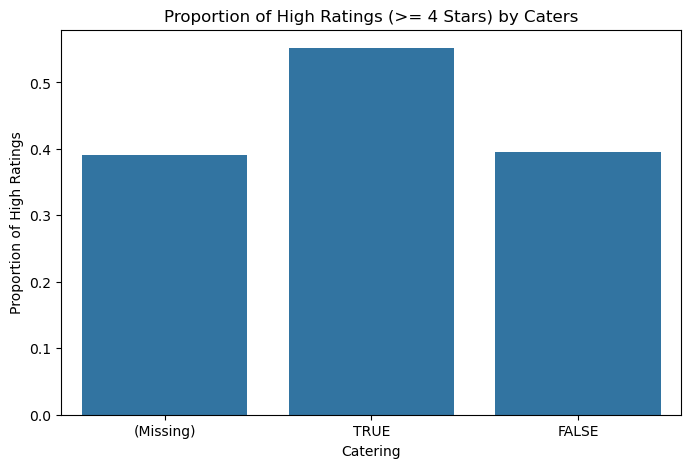

In [42]:
catering = yelp_data.groupby('Caters')['fourOrAbove'].mean()
print("Average proportion of high ratings by Caters:")
print(catering)

plt.figure(figsize=(8, 5))
sns.barplot(x='Caters', y='fourOrAbove', data=yelp_data, errorbar=None)
plt.title('Proportion of High Ratings (>= 4 Stars) by Caters')
plt.xlabel('Catering')
plt.ylabel('Proportion of High Ratings')
plt.show()